#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [2]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# Good Luck!

# 1.Basic Data Exploration

In [4]:
df.shape

(148654, 13)

In [5]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [22]:
for i in df.columns:
    print(i,df[i].value_counts())

Id 1         1
99079     1
99099     1
99100     1
99101     1
         ..
49553     1
49554     1
49555     1
49556     1
148654    1
Name: Id, Length: 148654, dtype: int64
EmployeeName Kevin Lee                   13
Richard Lee                 11
Steven Lee                  11
William Wong                11
Stanley Lee                  9
                            ..
Jeffrey Skover               1
Ken Dever                    1
Kevin Whitfield              1
Granville McCollough III     1
Joe Lopez                    1
Name: EmployeeName, Length: 110811, dtype: int64
JobTitle Transit Operator                                  7036
Special Nurse                                     4389
Registered Nurse                                  3736
Public Svc Aide-Public Works                      2518
Police Officer 3                                  2421
                                                  ... 
CHIEF HOUSING INSPECTOR                              1
TRAFFIC SIGNAL OPERATOR      

In [16]:
for i in df.columns:
    print(i,df[i].unique())

Id [     1      2      3 ... 148652 148653 148654]
EmployeeName ['NATHANIEL FORD' 'GARY JIMENEZ' 'ALBERT PARDINI' ... 'Charlene D Mccully'
 'Not provided' 'Joe Lopez']
JobTitle ['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY'
 'CAPTAIN III (POLICE DEPARTMENT)' 'WIRE ROPE CABLE MAINTENANCE MECHANIC'
 ... 'Conversion' 'Cashier 3' 'Not provided']
BasePay [1.6741118e+05 1.5596602e+05 2.1273913e+05 ... 1.7260000e+01 6.0400000e+00
 1.5500000e+01]
OvertimePay [0.0000000e+00 2.4513188e+05 1.0608818e+05 ... 1.0270000e+02 5.6770000e+01
           nan]
OtherPay [ 4.0018425e+05  1.3781138e+05  1.6452600e+04 ...  1.5350000e+01
            nan -6.1813000e+02]
Benefits [         nan 4.443012e+04 6.981019e+04 ... 2.200000e-01 1.300000e-01
 1.240000e+00]
TotalPay [ 5.6759543e+05  5.3890928e+05  3.3527991e+05 ...  1.2890000e+01
  6.0000000e+00 -6.1813000e+02]
TotalPayBenefits [ 5.6759543e+05  5.3890928e+05  3.3527991e+05 ...  1.2890000e+01
  7.2400000e+00 -6.1813000e+02]
Year [2011 2012 2013 2014]
Note

# 2.Descriptive Statistics

In [24]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


In [29]:
#salary median
df.TotalPay.median()

71426.60999999999

In [30]:
#salary mode
df.TotalPay.mode()

0    0.0
Name: TotalPay, dtype: float64

In [27]:
# range of salary
df.TotalPay.max() - df.TotalPay.min()

568213.56

In [31]:
#mean & std and another statistics in describe() cell

# 3.Data Cleaning

In [32]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [35]:
print("Notes: ",df.Notes.notnull().sum())

Notes:  0


In [36]:
print("Status: ",df.Status.notnull().sum())

Status:  0


I will drop this two columns since they all have no values 
and will mislead our analysis

In [40]:
df.drop("Notes",axis=1,inplace=True)
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco,NaN


In [41]:
df.drop("Status",axis=1,inplace=True)
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco


In [42]:
df.isnull().sum()

Id                      0
EmployeeName            0
JobTitle                0
BasePay               609
OvertimePay             4
OtherPay                4
Benefits            36163
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64

- now we have many options we can fill nans with mean median mode we can drop nans.. etc
- but in this case i will just fill them with zeroes since it's calculations related to salary so zeroes will not affect our calculations better than just dropping the whole row and better than filling with mean 
- so if your salary contains nan it is better to say your salary contains zeroes than mean

In [44]:
df.fillna(0,inplace=True)

In [47]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,San Francisco


In [46]:
df.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

In [48]:
## done

# 4.Basic Data Visualization

In [53]:
import matplotlib.pyplot as plt

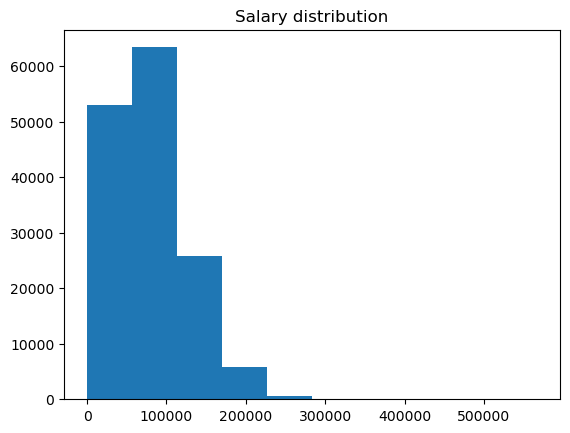

In [55]:
plt.hist(df.TotalPay)
plt.title("Salary distribution")
plt.show()

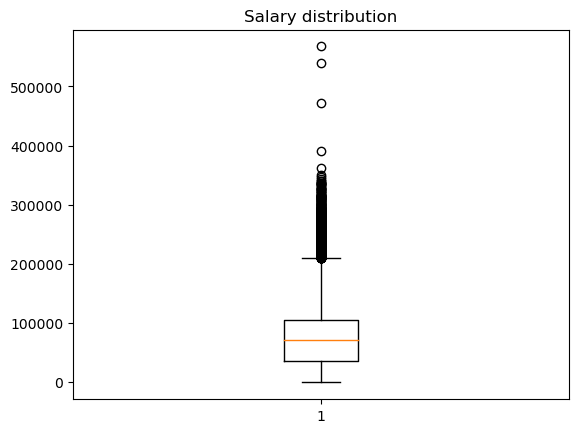

In [57]:
plt.boxplot(df.TotalPay)
plt.title("Salary distribution")
plt.show()

it seems that there is many outliers above the maximum

In [72]:
df.JobTitle.value_counts()

Transit Operator                                  7036
Special Nurse                                     4389
Registered Nurse                                  3736
Public Svc Aide-Public Works                      2518
Police Officer 3                                  2421
                                                  ... 
CHIEF HOUSING INSPECTOR                              1
TRAFFIC SIGNAL OPERATOR                              1
COURT COMPUTER FACILITIES COORDINATOR                1
AUTOMOTIVE BODY AND FENDER WORKER SUPERVISOR I       1
VICTIM & WITNESS TECHNICIAN                          1
Name: JobTitle, Length: 2159, dtype: int64

### We have 2159 value in JobTitles so lets take only top 10

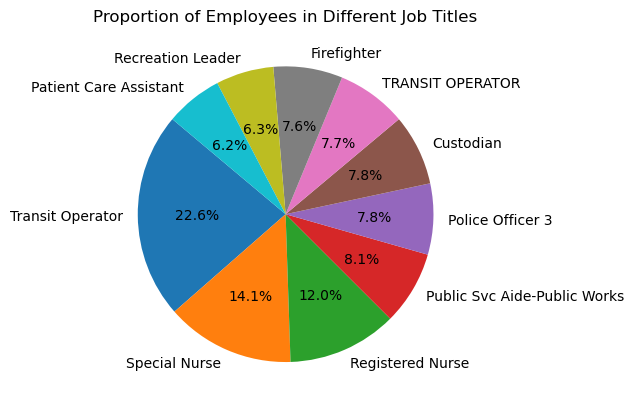

In [70]:
job_titles = df['JobTitle']
job_title_counts = job_titles.value_counts()

top_job_titles = job_title_counts.head(10)

plt.pie(top_job_titles, labels=top_job_titles.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Employees in Different Job Titles')
plt.show()

# 5.Grouped Analysis

In [108]:
df.groupby('JobTitle')['TotalPay'].mean().sort_values(ascending=False)

JobTitle
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY    399211.275000
Chief Investment Officer                          339653.700000
Chief of Police                                   329183.646667
Chief, Fire Department                            325971.683333
DEPUTY DIRECTOR OF INVESTMENTS                    307899.460000
                                                      ...      
Commissioner 16.700c, No Pay                          25.760000
IS Technician Assistant                                0.000000
Not provided                                           0.000000
Public Safety Comm Tech                                0.000000
Drug Court Coordinator                                 0.000000
Name: TotalPay, Length: 2159, dtype: float64

In [109]:
df.groupby('JobTitle')['TotalPay'].sum().sort_values(ascending=False)

JobTitle
Transit Operator                           4.553076e+08
Registered Nurse                           4.322574e+08
Firefighter                                3.441351e+08
Police Officer 3                           3.266096e+08
Deputy Sheriff                             2.120763e+08
                                               ...     
PUBLIC SAFETY COMMUNICATIONS TECHNICIAN    1.495100e+02
Public Safety Comm Tech                    0.000000e+00
IS Technician Assistant                    0.000000e+00
Not provided                               0.000000e+00
Drug Court Coordinator                     0.000000e+00
Name: TotalPay, Length: 2159, dtype: float64

In [82]:
df.groupby('JobTitle').agg({
    'TotalPay': 'mean',
    'BasePay': 'mean',
    'OvertimePay': 'mean'
}).sort_values(by="TotalPay",ascending=False)

# mean comparison

,TotalPay,BasePay,OvertimePay
JobTitle,,,
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,399211.275000,199119.150000,0.0
Chief Investment Officer,339653.700000,257340.000000,0.0
Chief of Police,329183.646667,309767.683333,0.0
"Chief, Fire Department",325971.683333,304232.340000,0.0
DEPUTY DIRECTOR OF INVESTMENTS,307899.460000,256576.960000,0.0
...,...,...,...
"Commissioner 16.700c, No Pay",25.760000,25.760000,0.0
IS Technician Assistant,0.000000,0.000000,0.0
Not provided,0.000000,0.000000,0.0


In [80]:
 df.groupby('JobTitle').agg({
    'TotalPay': 'sum',
    'BasePay': 'sum',
    'OvertimePay': 'sum'
}).sort_values(by="TotalPay",ascending=False)
#sum comparison

,TotalPay,BasePay,OvertimePay
JobTitle,,,
Transit Operator,4.553076e+08,3.611108e+08,78403983.45
Registered Nurse,4.322574e+08,3.823727e+08,15709284.39
Firefighter,3.441351e+08,2.401020e+08,66931108.48
Police Officer 3,3.266096e+08,2.616144e+08,39748129.59
Deputy Sheriff,2.120763e+08,1.668524e+08,27702498.14
...,...,...,...
PUBLIC SAFETY COMMUNICATIONS TECHNICIAN,1.495100e+02,0.000000e+00,0.00
Public Safety Comm Tech,0.000000e+00,0.000000e+00,0.00
IS Technician Assistant,0.000000e+00,0.000000e+00,0.00


In [90]:
df.groupby("EmployeeName")["TotalPay"].sum().sort_values(ascending=False)

EmployeeName
Kevin Lee              1318767.63
Steven Lee             1260616.60
Stanley Lee            1132978.50
William Wong           1098066.81
Richard Lee             944997.67
                          ...    
Joann  Seabury               0.00
Kevin  Oller                 0.00
Jacqueline  Hubbard          0.00
Roland Baylon                0.00
Joe Lopez                 -618.13
Name: TotalPay, Length: 110811, dtype: float64

In [91]:
##sum salary of each employee sorted descending ( richest people in company )

# 6.Simple Correlation Analysis

Text(0.5, 1.0, 'Correlation between TotalPay and BaseDay')

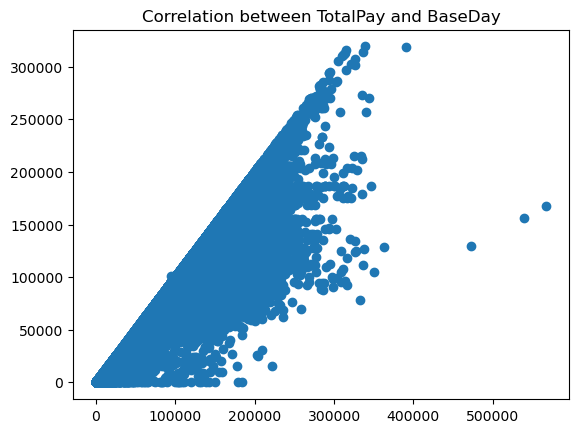

In [96]:
plt.scatter(df.TotalPay,df.BasePay)
plt.title("Correlation between TotalPay and BaseDay")

In [92]:
df.TotalPay.corr(df.BasePay)

0.9546925905788388

Text(0.5, 1.0, 'Correlation between TotalPay and OvertimePay')

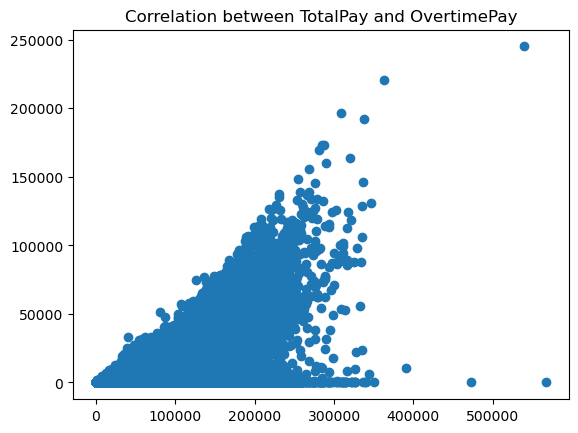

In [97]:
plt.scatter(df.TotalPay,df.OvertimePay)
plt.title("Correlation between TotalPay and OvertimePay")

In [98]:
df.TotalPay.corr(df.OvertimePay)

0.5048602762311212

Text(0.5, 1.0, 'Correlation between TotalPay and OtherPay')

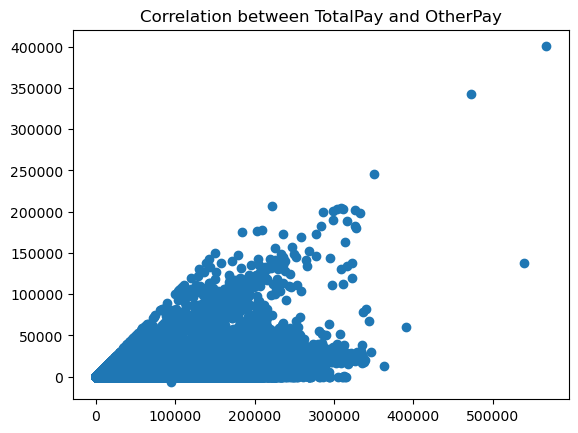

In [100]:
plt.scatter(df.TotalPay,df.OtherPay)
plt.title("Correlation between TotalPay and OtherPay")

In [101]:
df.TotalPay.corr(df.OtherPay)

0.47049877253577393

Text(0.5, 1.0, 'Correlation between TotalPay and Benefits')

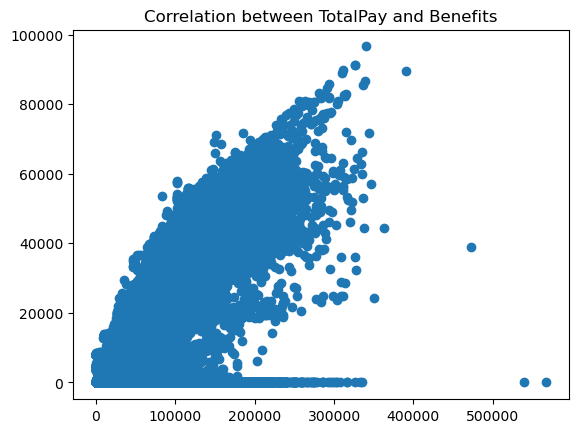

In [102]:
plt.scatter(df.TotalPay,df.Benefits)
plt.title("Correlation between TotalPay and Benefits")

In [103]:
df.TotalPay.corr(df.Benefits)

0.6322018839186362

Text(0.5, 1.0, 'Correlation between TotalPay and TotalPayBenefits')

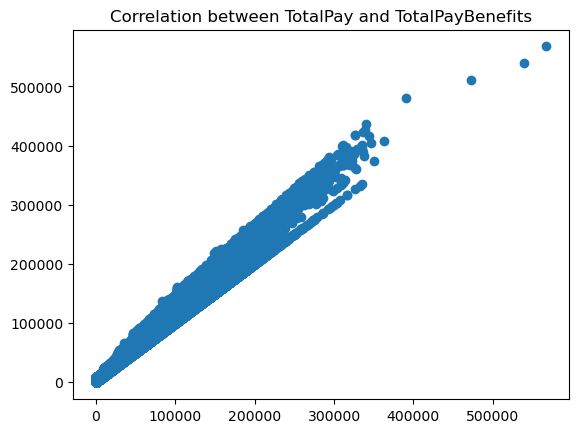

In [104]:
plt.scatter(df.TotalPay,df.TotalPayBenefits)
plt.title("Correlation between TotalPay and TotalPayBenefits")

In [105]:
df.TotalPay.corr(df.TotalPayBenefits)

0.9773128522072128

# 7.Summary of Insights

- Data contained many nulls especially in column Notes and Status they where all nulls
- There is no duplications in data which is great
- Salary distribution is right skewed which mean most salary are concenterated at the start
- Salary contains many outliers 
- Most employees work as Transit Operators
- The average salary of the GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY is the highest
- The sum salary of Transit operator job is highest (company pay most to this department)
- Kevin Lee is the top paid employee in this company
- Correlation is very high between TotalPay (Salary) and (BasePay, TotalPayBenefits)